In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import cross_validation
import matplotlib as plt
import math
%matplotlib inline

/Users/jsche4/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jsche4/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Store the data 
data = pd.read_excel("data_ready.xlsx",index=True)

In [3]:
data

,VehicleType,VehicleMake,VehicleColor,Gender,Intersection,Stop
0,ev,ford,white,m,Market & Green,0
1,truck,dodge,blue,m,Market & Green,0
2,car,buick,silver,m,Market & Green,0
3,suv,ford,white,f,Market & Green,0
4,Sc,chevy,red,m,Market & Green,0
5,truck,toyota,silver,m,Market & Green,0
6,suv,gmc,silver,f,Market & Green,1
7,suv,kia,red,f,Market & Green,0
8,suv,subaru,blue,f,Market & Green,0
9,truck,chevy,blue,m,Market & Green,0


In [4]:
data.columns

Index(['VehicleType', 'VehicleMake', 'VehicleColor', 'Gender', 'Intersection',
       'Stop'],
      dtype='object')

In [5]:
data.Stop.value_counts()

0    177
1     39
Name: Stop, dtype: int64

In [6]:
data.VehicleType.value_counts()

suv      87
car      79
truck    30
cm        9
ev        4
sc        4
car       2
Sc        1
Name: VehicleType, dtype: int64

In [7]:
data[data['VehicleType']=='car']

,VehicleType,VehicleMake,VehicleColor,Gender,Intersection,Stop
2,car,buick,silver,m,Market & Green,0
14,car,hyundai,white,f,Market & Green,1
16,car,ford,silver,m,Market & Green,0
19,car,nissan,black,f,Market & Green,0
22,car,ford,red,m,Market & Green,0
24,car,toyota,white,m,Market & Green,0
26,car,ford,blue,f,Market & Green,0
28,car,toyota,white,f,Market & Green,1
30,car,chrysler,white,m,Market & Green,1
32,car,toyota,white,m,Market & Green,0


In [8]:
# Checking for space before, during input
data[data['VehicleType']==' car']

,VehicleType,VehicleMake,VehicleColor,Gender,Intersection,Stop


In [9]:
# Checking for space after, during input
data[data['VehicleType']=='car ']

,VehicleType,VehicleMake,VehicleColor,Gender,Intersection,Stop
159,car,chevy,green,m,Broad & Market,0
180,car,chevy,blue,f,Green & Prospect,0


In [10]:
i=0
for value in data.VehicleType:
    if (value=='car '):
        data['VehicleType'][i] = 'car'
    i += 1

/Users/jsche4/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
# Ensure values for 'car ' have been fixed and changed to 'car'.
data.VehicleType.value_counts()

suv      87
car      81
truck    30
cm        9
ev        4
sc        4
Sc        1
Name: VehicleType, dtype: int64

In [12]:
# Fix input typo for value 'Sc' to match 'sc'.
i=0
for value in data.VehicleType:
    if (value=='Sc'):
        data['VehicleType'][i] = 'sc'
    i += 1

/Users/jsche4/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
# Ensure values for 'Sc' have been fixed and changed to 'sc'.
data.VehicleType.value_counts()

suv      87
car      81
truck    30
cm        9
sc        5
ev        4
Name: VehicleType, dtype: int64

In [14]:
data.VehicleColor.value_counts()

silver    52
white     40
red       35
blue      35
black     34
gold      10
green      9
grey       1
Name: VehicleColor, dtype: int64

In [15]:
# Fix input typo for value 'grey' to match 'silver'.
i=0
for value in data.VehicleColor:
    if (value=='grey'):
        data['VehicleColor'][i] = 'silver'
    i += 1

/Users/jsche4/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
data.VehicleColor.value_counts()

silver    53
white     40
red       35
blue      35
black     34
gold      10
green      9
Name: VehicleColor, dtype: int64

In [17]:
data.VehicleMake.value_counts()

ford          46
chevy         34
nissan        19
hyundai       15
toyota        15
dodge         13
jeep          12
honda         10
subaru         9
kia            8
gmc            8
mazda          6
chrysler       5
mitsubishi     4
buick          3
mercury        3
saturn         2
vw             1
pontiac        1
vovo           1
audi           1
Name: VehicleMake, dtype: int64

In [18]:
# Fix typo change value from 'vovo' to correct spelling 'volvo'
i=0
for value in data.VehicleMake:
    if (value=='vovo'):
        data['VehicleMake'][i] = 'volvo'
    i += 1

/Users/jsche4/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
data.VehicleMake.value_counts()

ford          46
chevy         34
nissan        19
hyundai       15
toyota        15
dodge         13
jeep          12
honda         10
subaru         9
kia            8
gmc            8
mazda          6
chrysler       5
mitsubishi     4
buick          3
mercury        3
saturn         2
vw             1
pontiac        1
volvo          1
audi           1
Name: VehicleMake, dtype: int64

In [20]:
data.Gender.value_counts()

m    124
f     91
F      1
Name: Gender, dtype: int64

In [21]:
# Fix typo change value from 'F' to correct value 'f'
i=0
for value in data.Gender:
    if (value=='F'):
        data['Gender'][i] = 'f'
    i += 1

/Users/jsche4/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
data.Gender.value_counts()

m    124
f     92
Name: Gender, dtype: int64

In [23]:
data.Intersection.value_counts()

Prosepect & Broad    58
Green & Prospect     56
Market & Green       54
Broad & Market       48
Name: Intersection, dtype: int64

In [24]:
y = data.pop("Stop")

In [25]:
X = data

In [26]:
categorical_features = ['VehicleType','VehicleMake','VehicleColor','Gender','Intersection']

In [27]:
for feature in categorical_features:
    # Create array of dummies
    dummies = pd.get_dummies(X[feature], prefix=feature)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([feature], axis=1, inplace=True)

In [28]:
X

,VehicleType_car,VehicleType_cm,VehicleType_ev,VehicleType_sc,VehicleType_suv,VehicleType_truck,VehicleMake_audi,VehicleMake_buick,VehicleMake_chevy,VehicleMake_chrysler,...,VehicleColor_green,VehicleColor_red,VehicleColor_silver,VehicleColor_white,Gender_f,Gender_m,Intersection_Broad & Market,Intersection_Green & Prospect,Intersection_Market & Green,Intersection_Prosepect & Broad
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [29]:
# Split the data into training and testing sets using a 20% holdout (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [30]:
### Grid Search
n_estimators = [300,400,500,1000,2000]
max_features = ['auto', 'sqrt','log2', 0.9, 0.2]
min_samples_split = [2,3,5,7,9]
min_samples_leaf = [1,2,3,4]


rfc = RandomForestClassifier(n_jobs=-1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split,
                              min_samples_leaf=min_samples_leaf
                              ), cv=None, n_jobs=-1)

In [31]:
#estimator.fit(X_train, y_train)

In [32]:
# Display the best RF model found by grid search
#estimator.best_estimator_

In [37]:
best_rfc = RandomForestClassifier(max_features='auto', n_estimators=1000, n_jobs=-1)

In [38]:
best_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [39]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

AUC Score:  0.412735849057


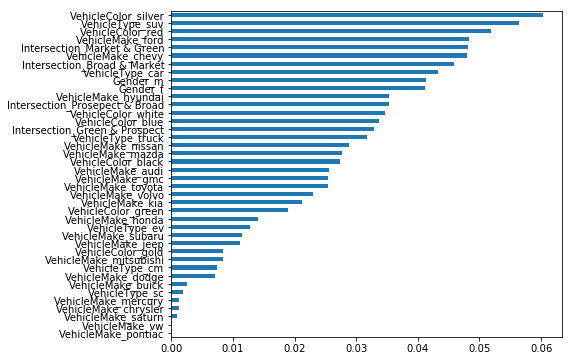

In [40]:
# Simple version that shows all of the variables
feature_importances = pd.Series(best_rfc.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

In [42]:
X.drop('VehicleMake_pontiac',axis=1,inplace=True)
X.drop('VehicleMake_vw',axis=1,inplace=True)

In [43]:
# Split the data into training and testing sets using a 20% holdout (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [45]:
best_rfc = RandomForestClassifier(max_features='auto', n_estimators=2000, n_jobs=-1)

In [46]:
best_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [47]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

AUC Score:  0.431603773585


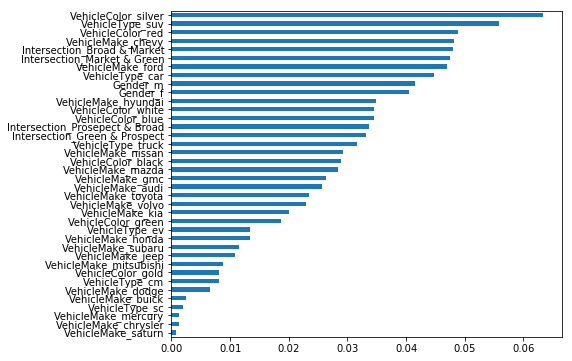

In [48]:
# Simple version that shows all of the variables
feature_importances = pd.Series(best_rfc.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));